In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [1]:
# df = pd.read_csv("/kaggle/input/car-price-prediction/_Dataset.csv") 
# df.head()

### Null values

In [189]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [190]:
df.isnull().sum()/len(df)*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

In [191]:
# no. of null values are < 10% so dropping the rows which contains null values
df.dropna(inplace=True)

In [192]:
df.isnull().sum()/len(df)*100

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          0.0
engine           0.0
max_power        0.0
torque           0.0
seats            0.0
dtype: float64

### duplicate Values

In [193]:
# We can see here that so many cars having same name with different data so we can't set name as Index
df.name.duplicated().value_counts() 

True     5924
False    1982
Name: name, dtype: int64

In [194]:
# Checking Duplicate Rows
df.duplicated().value_counts()

False    6717
True     1189
dtype: int64

In [195]:
# Removing Duplicate Rows
df.drop_duplicates(inplace=True)

In [196]:
df.duplicated().value_counts()

False    6717
dtype: int64

In [197]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [198]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Removing units of mileage,	engine	& max_power (Continuous data with unit)

In [199]:
def Remove_unit(unit):
    val = unit.split(' ')
    val1 = val[0]
    return val1

In [200]:
df['mileage'] = df["mileage"].apply(Remove_unit)
df['mileage'] = df['mileage'].astype(float)
df['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8121    18.90
8122    22.54
8123    18.50
8124    16.80
8125    19.30
Name: mileage, Length: 6717, dtype: float64

In [201]:
df['engine'] = df['engine'].apply(Remove_unit)
df['engine'] = df['engine'].astype(int)
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8121     998
8122    1396
8123    1197
8124    1493
8125    1248
Name: engine, Length: 6717, dtype: int32

In [202]:
df['max_power'] = df['max_power'].apply(Remove_unit)
df['max_power'] = df['max_power'].astype(float)
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8121     67.10
8122     88.73
8123     82.85
8124    110.00
8125     73.90
Name: max_power, Length: 6717, dtype: float64

In [203]:
# Converting the datatype of 'seats' to string object since it is a categorical data
df['seats'] = df['seats'].astype(str)


In [204]:
# Create the 'brand' column by splitting the 'name' column
df['brand'] = df['name'].str.split(' ').str.get(0)
df.drop(['name'],axis=1,inplace=True)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   seller_type    6717 non-null   object 
 5   transmission   6717 non-null   object 
 6   owner          6717 non-null   object 
 7   mileage        6717 non-null   float64
 8   engine         6717 non-null   int32  
 9   max_power      6717 non-null   float64
 10  torque         6717 non-null   object 
 11  seats          6717 non-null   object 
 12  brand          6717 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(7)
memory usage: 708.4+ KB


In [206]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


## Unique values

In [207]:
# Check the unique value from the columns
print(df['brand'].unique())
print(df["year"].unique())
print(df["fuel"].unique())
print(df["seller_type"].unique())
print(df["transmission"].unique())
print(df["owner"].unique())
print(df["seats"].unique())

['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
['5.0' '4.0' '7.0' '8.0' '6.0' '9.0' '10.0' '14.0' '2.0']


In [208]:
#  Remove the torque column because does not contain much information 
df.drop(['torque'],axis=1, inplace = True)

In [209]:
# creating new feature Vahicle_age
df['Vahicle_age']=2023-df['year']

# Removing year Column
df.drop(['year'],axis=1,inplace=True )

In [210]:
#Replace string of the owner with numerical
df['owner'] = df['owner'].replace({'First Owner' : 1,'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4})

In [211]:
print(df["Vahicle_age"].unique())
print(df["fuel"].unique())
print(df["seller_type"].unique())
print(df["transmission"].unique())
print(df["owner"].unique())
print(df["seats"].unique())
print(df['brand'].unique())

[ 9 17 13 16  6 22 12 10 18 14  7 11 21  8  5  4 15  3 24 23 20 19 29 25
 26 28 27]
['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
[1 2 3 4 'Test Drive Car']
['5.0' '4.0' '7.0' '8.0' '6.0' '9.0' '10.0' '14.0' '2.0']
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']


In [212]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,Vahicle_age
0,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0,Maruti,9
1,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,Skoda,9
2,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0,Honda,17
3,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0,Hyundai,13
4,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0,Maruti,16


## Outlier Analysis of Continuous Data

In [213]:
import seaborn as sns

In [214]:
Continuous = []
for i in df.columns:
    #print(i)
    if (df[i].dtype != object):
        Continuous.append(i)
Continuous

['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'Vahicle_age']

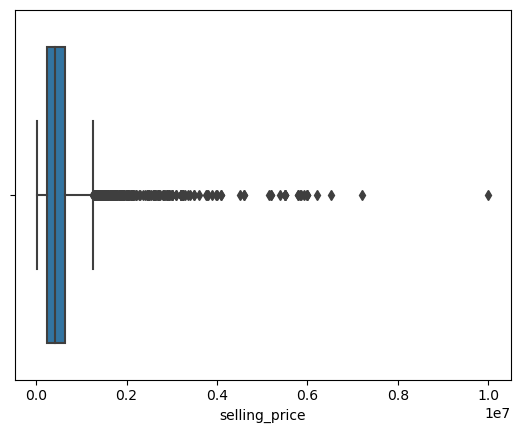

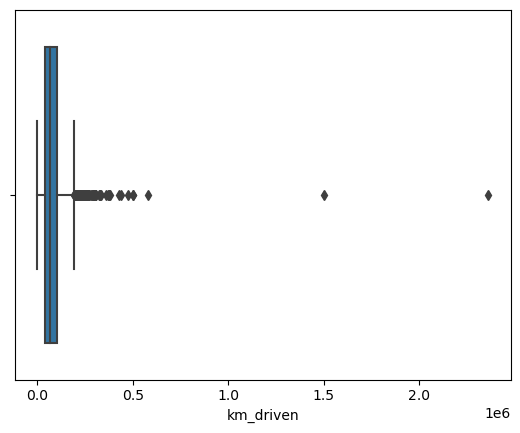

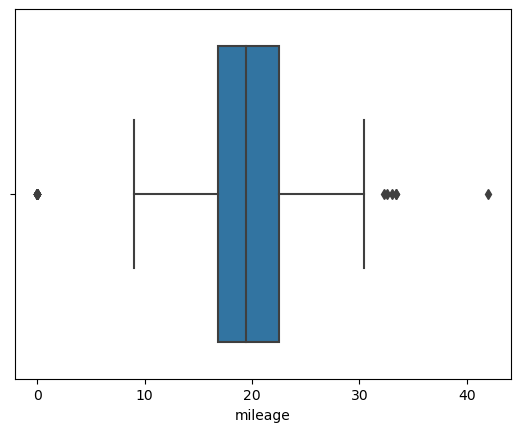

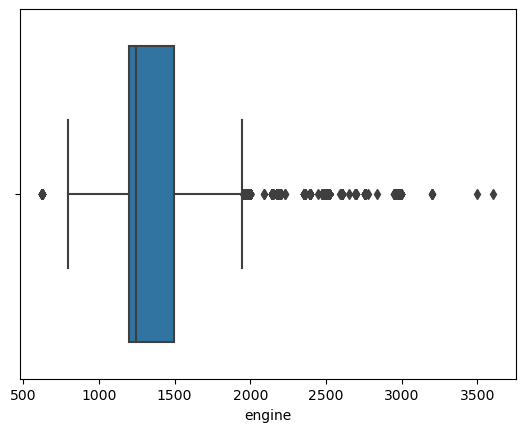

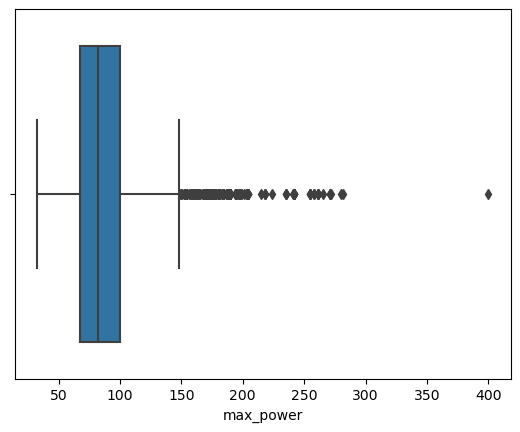

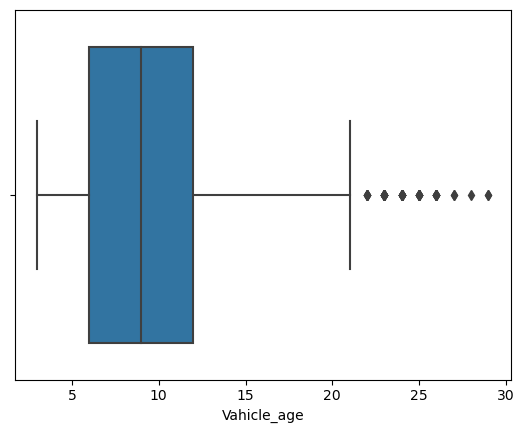

In [215]:
for column in Continuous:
    sns.boxplot(x=column ,data=df)
    plt.show()
    
# a=0
# for i in df['selling_price'].index:
#     if df.loc[i,'selling_price']>1250000:
#         a+=1
# print(a)

In [216]:
# a=0
# for i in df['Vahicle_age'].index:
#     if df.loc[i,'Vahicle_age']>21:
#         a+=1
# print(a)

In [217]:
for column in Continuous:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    for index in df[column].index:
        if df.loc[index,column]> ul:
            df.loc[index,column]=ul
        if df.loc[index,column]< ll:
            df.loc[index,column]=ll

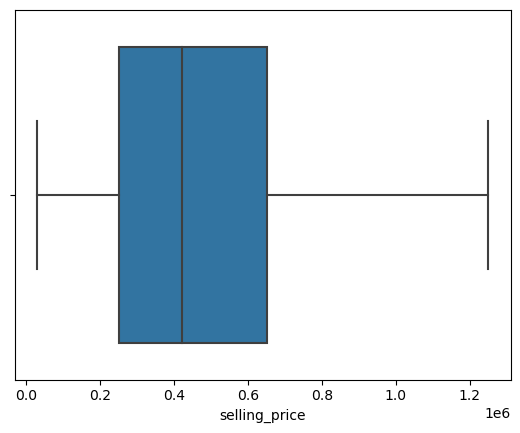

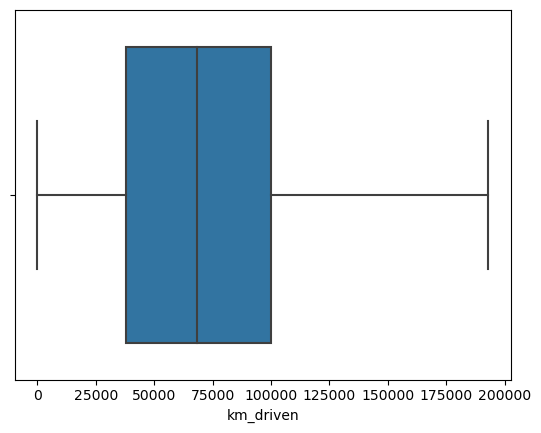

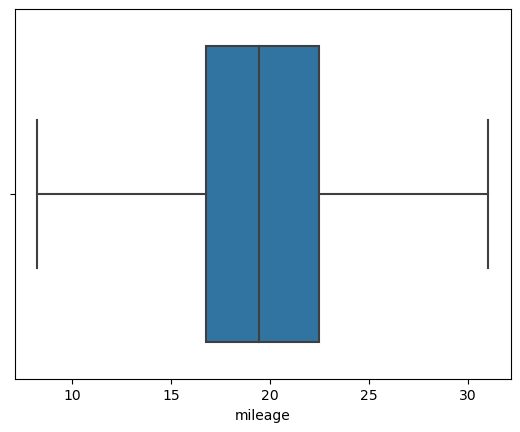

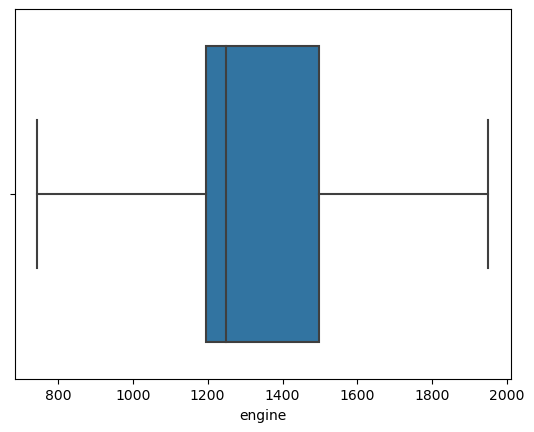

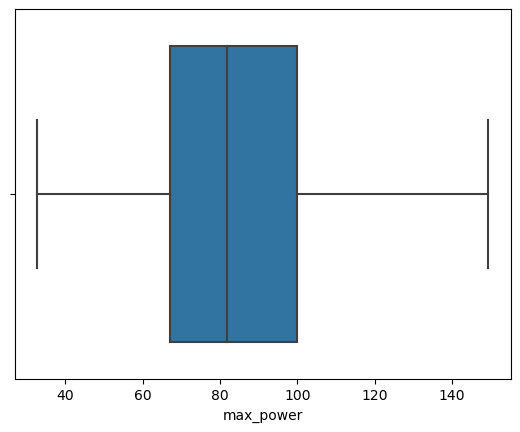

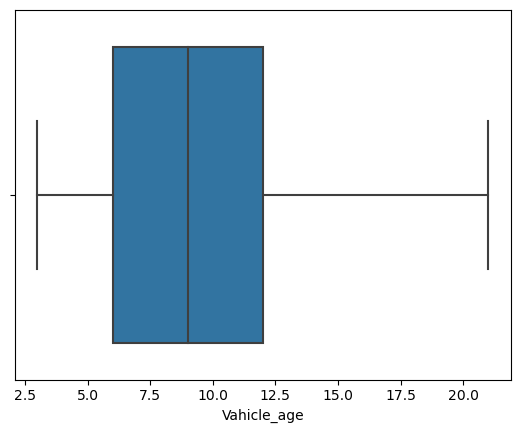

In [218]:
for column in Continuous:
    sns.boxplot(x=column ,data=df)
    plt.show()

## Explotary Data Analysis (EDA)

In [219]:
df.describe()

,selling_price,km_driven,mileage,engine,max_power,Vahicle_age
count,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000
mean,4.803580e+05,71633.997767,19.481977,1359.099375,86.233222,9.360727
std,2.989183e+05,43625.945858,3.966185,345.410518,26.873053,3.796941
min,2.999900e+04,1.000000,8.250000,745.500000,32.800000,3.000000
25%,2.500000e+05,38000.000000,16.800000,1197.000000,67.100000,6.000000
50%,4.200000e+05,68203.000000,19.440000,1248.000000,81.830000,9.000000
75%,6.500000e+05,100000.000000,22.500000,1498.000000,100.000000,12.000000
max,1.250000e+06,193000.000000,31.050000,1949.500000,149.350000,21.000000


## Univariate Anlaysis

Skew: 0.9262193070153814


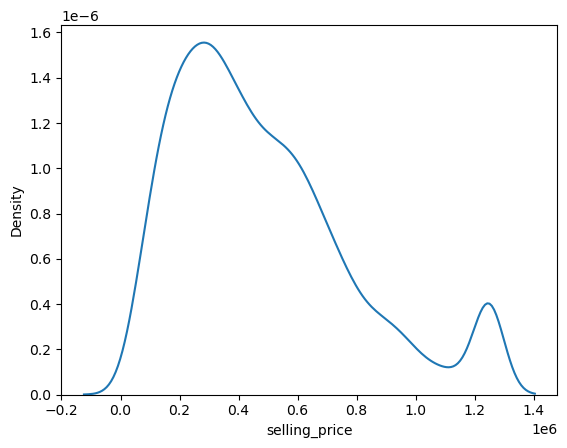

**************************************************
Skew: 0.7260893852010081


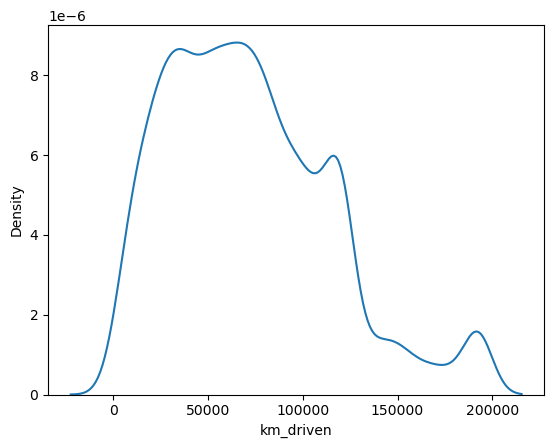

**************************************************
Skew: -0.010122722890510052


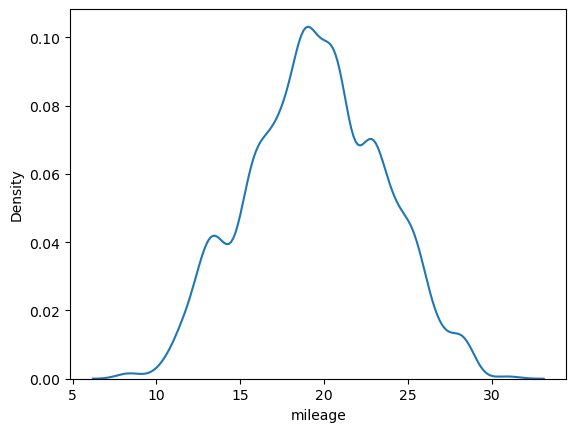

**************************************************
Skew: 0.3809864539299291


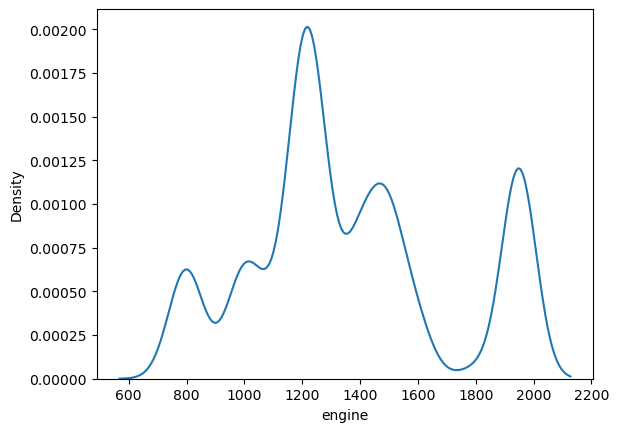

**************************************************
Skew: 0.7375630441464943


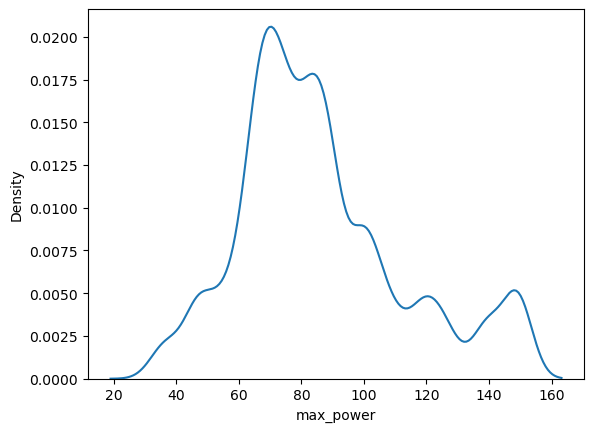

**************************************************
Skew: 0.7352871015793344


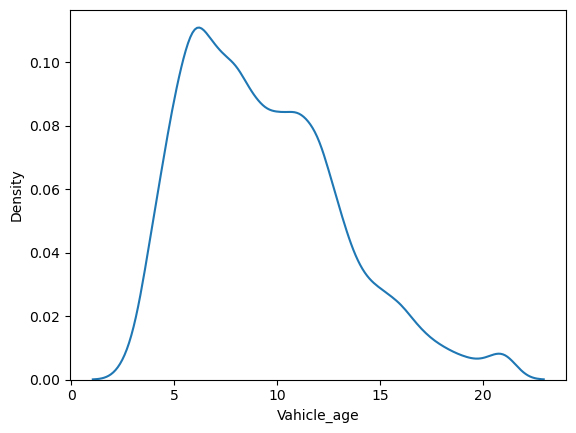

**************************************************


In [220]:

for column in Continuous:
    print('Skew:',df[column].skew())
    sns.kdeplot(x=column,data=df)
    plt.show()
    print("*"*50)

## Bivariate Analysis

### Catagorical IDV and TV

In [221]:
Catagorical = []
for i in df.columns:
    #print(i)
    if (df[i].dtype == object):
        Catagorical.append(i)
Catagorical

['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brand']

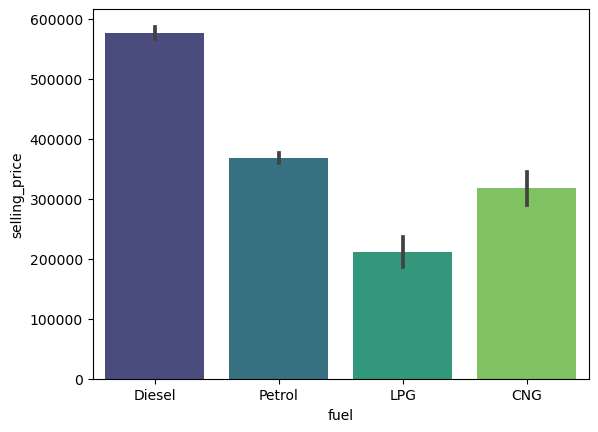

**************************************************


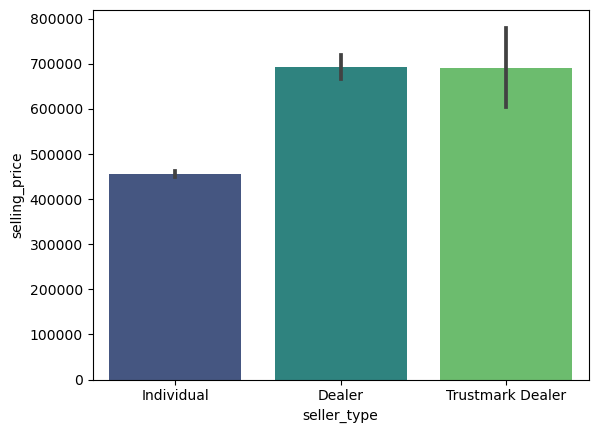

**************************************************


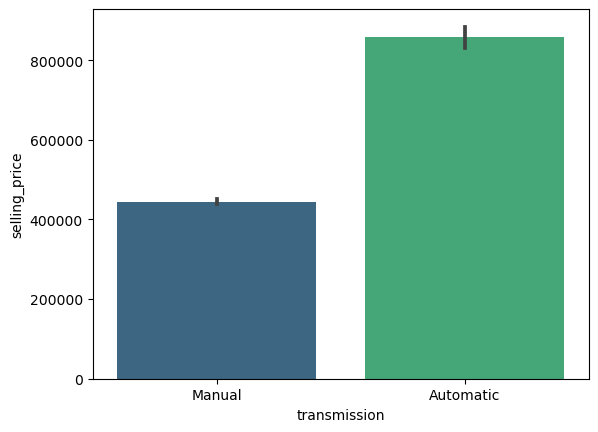

**************************************************


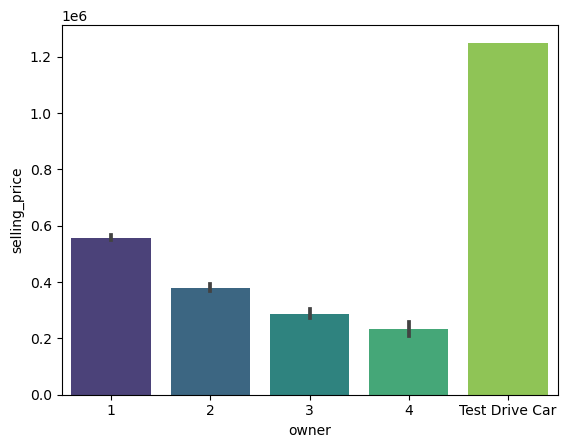

**************************************************


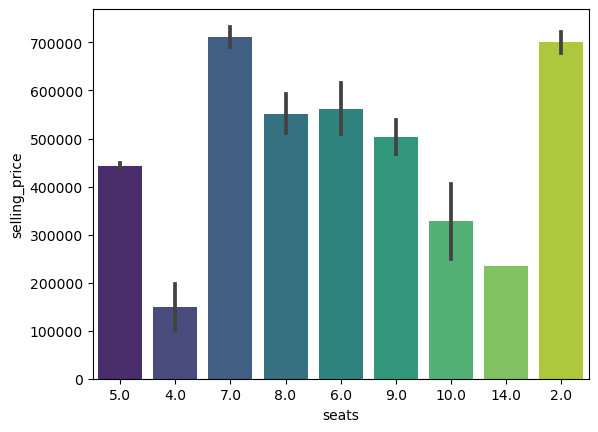

**************************************************


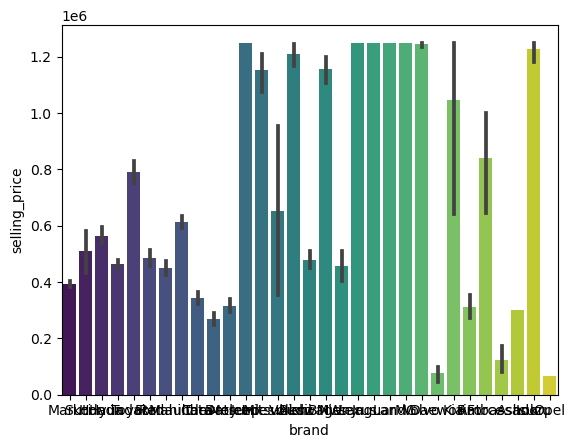

**************************************************


In [222]:
for column in Catagorical:
    sns.barplot(x=column,y='selling_price',data=df,palette='viridis')
    plt.show()
    print("*"*50)

### Continuous IDV and TV

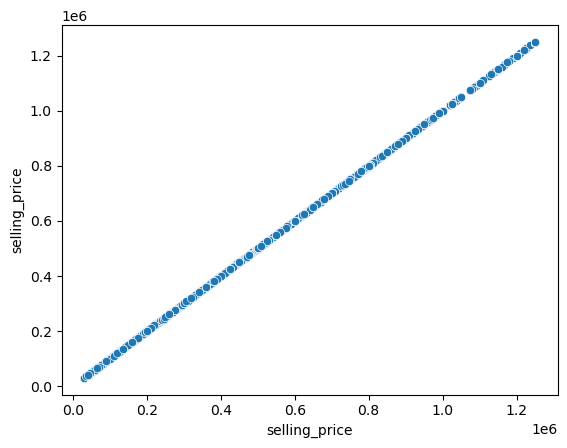

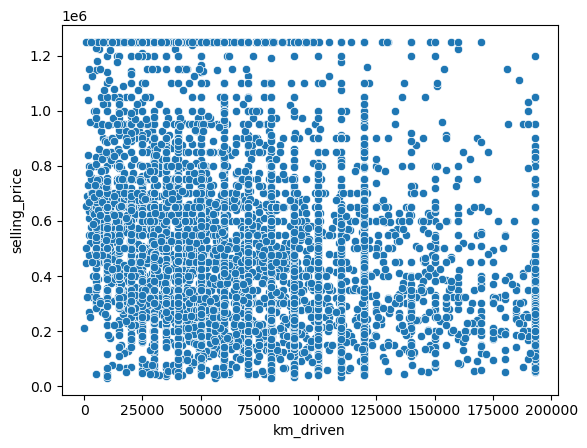

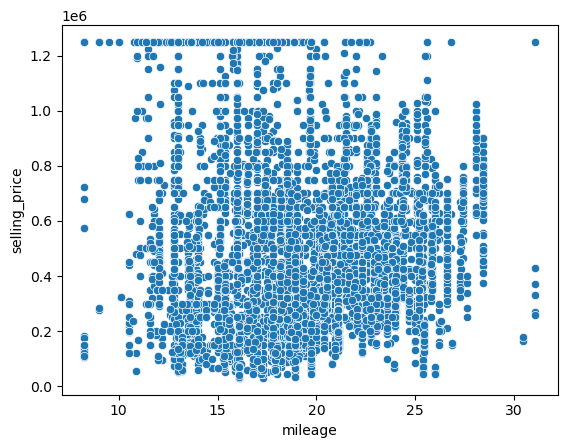

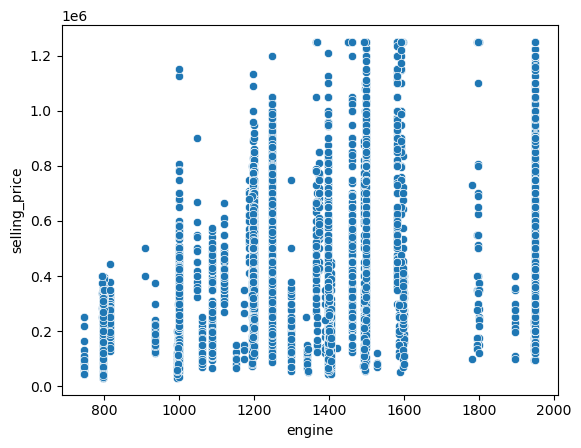

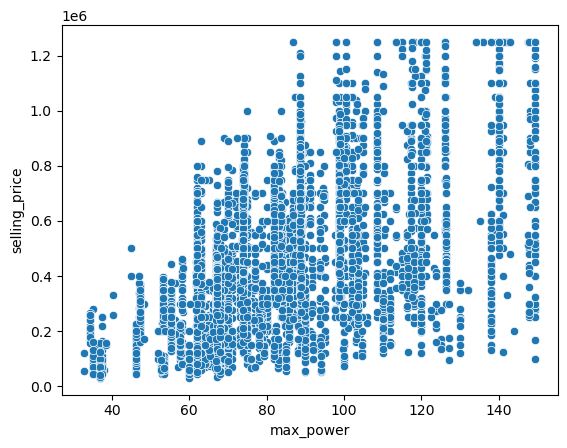

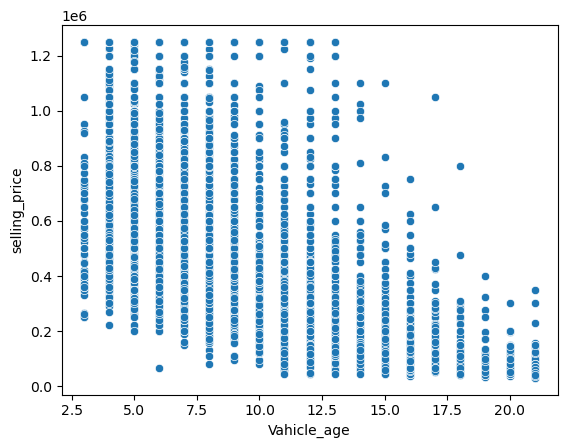

In [223]:
for column in Continuous:
    sns.scatterplot(x=column,y='selling_price',data=df)
    plt.show()

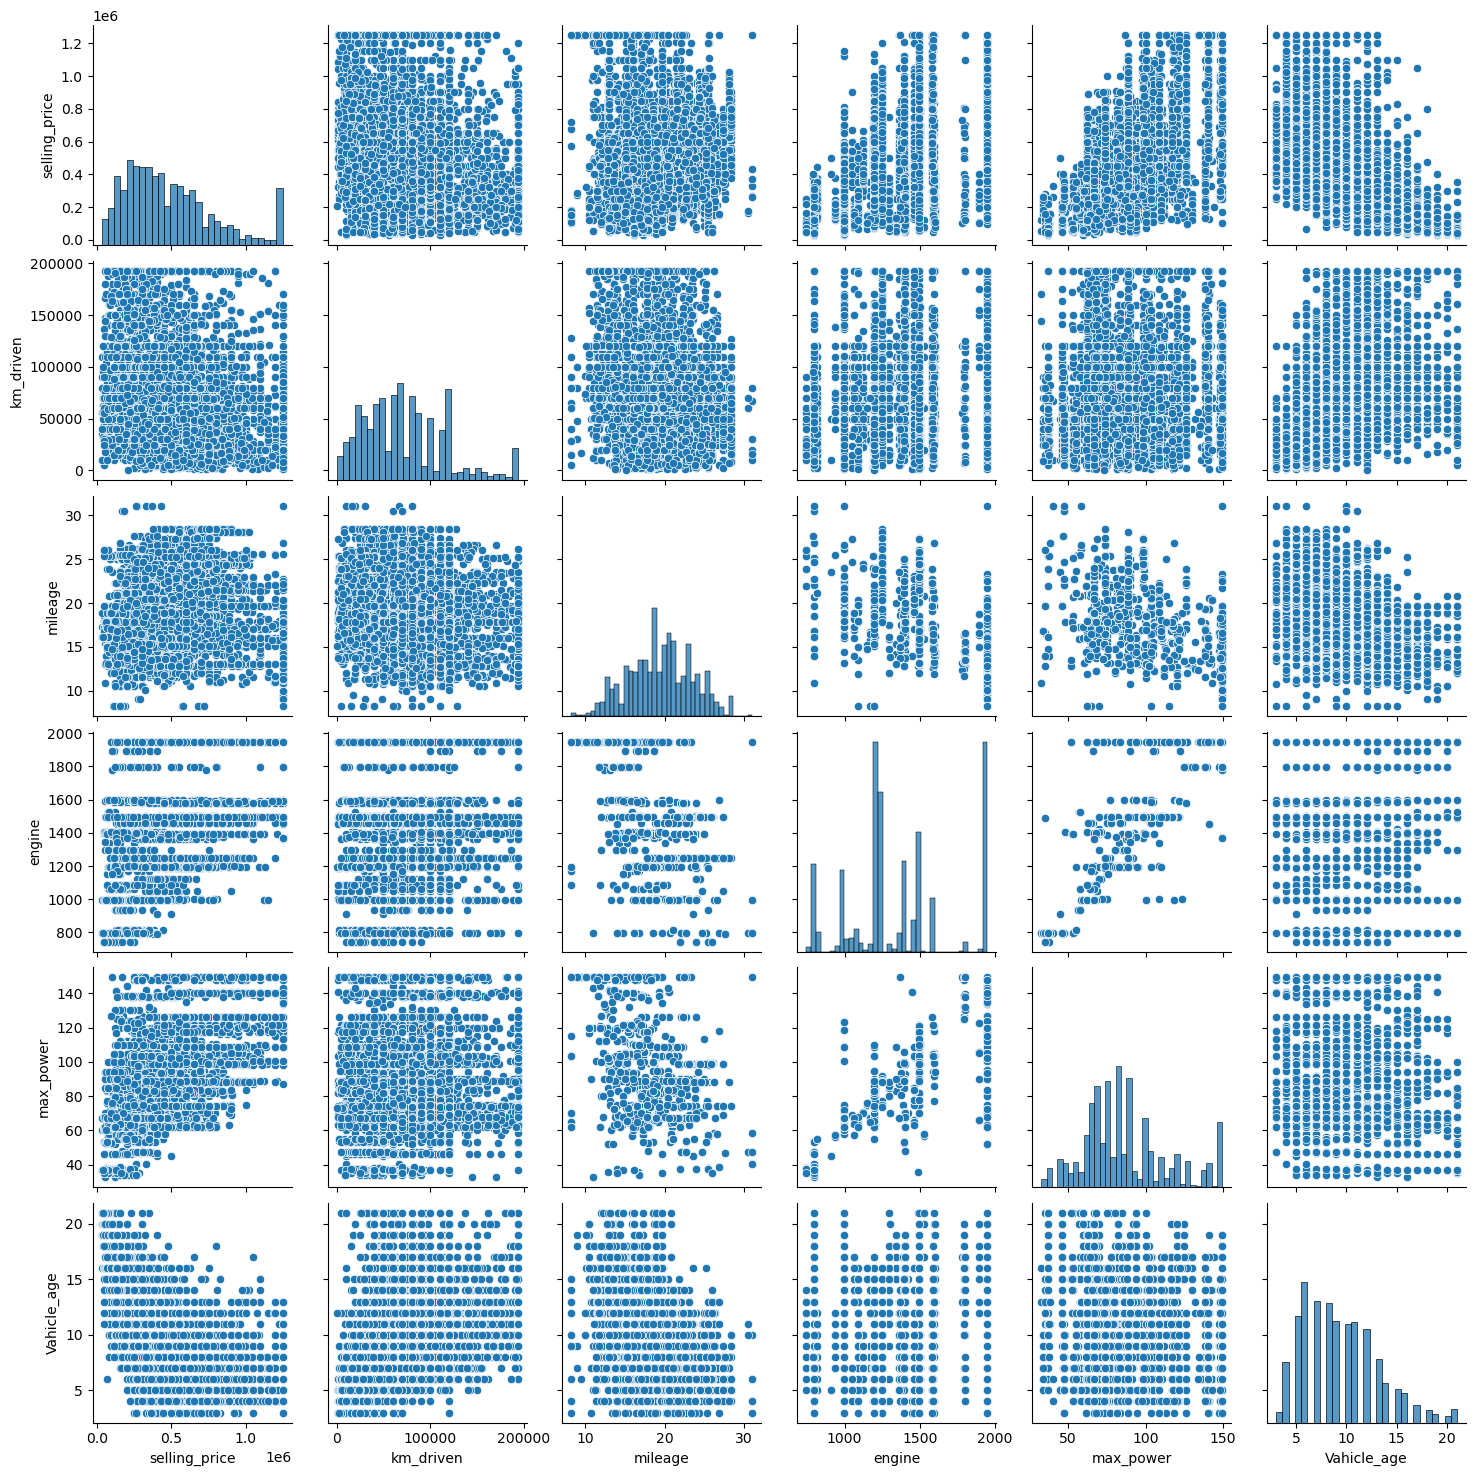

In [224]:
sns.pairplot(df)

## Correlation or Bivariate/Multivariate Analysis

C:\Users\Ashish Vora\AppData\Local\Temp\ipykernel_8084\957608088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.5,cmap='coolwarm', linecolor='Black')


<Axes: >

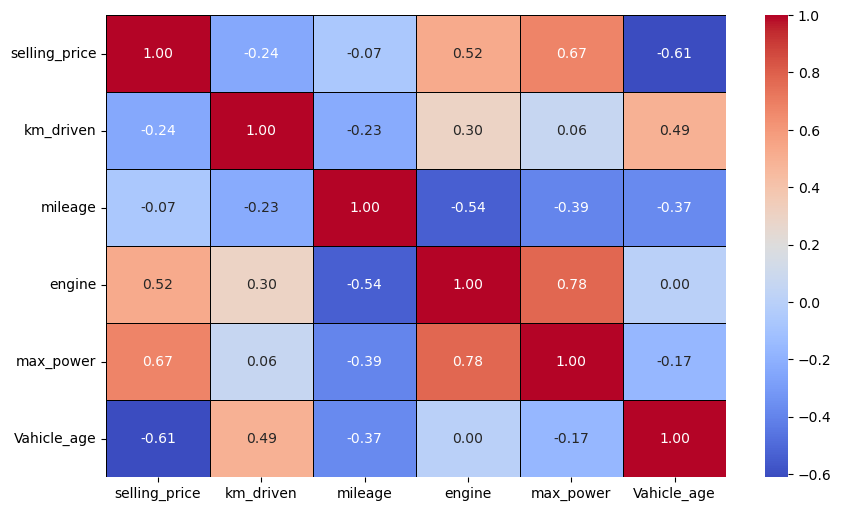

In [225]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.5,cmap='coolwarm', linecolor='Black')

## One-Hot Encoding to Represent the Categorical Data for Regression Modelling

In [226]:
df = pd.get_dummies(data = df, drop_first=True,)

df.head()

,selling_price,km_driven,mileage,engine,max_power,Vahicle_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,450000,145500,23.40,1248.0,74.00,9,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,9,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,158000,140000,17.70,1497.0,78.00,17,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000,23.00,1396.0,90.00,13,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,16,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Scaling the Continuous data

In [227]:
from sklearn.preprocessing import StandardScaler  # Standardization

In [228]:
x = df.drop(['selling_price'],axis=1)
y = df['selling_price']
x.head()

,km_driven,mileage,engine,max_power,Vahicle_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,145500,23.40,1248.0,74.00,9,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,21.14,1498.0,103.52,9,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,140000,17.70,1497.0,78.00,17,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,127000,23.00,1396.0,90.00,13,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,120000,16.10,1298.0,88.20,16,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
print(x.head(),y.head())

   km_driven  mileage  engine  max_power  Vahicle_age  fuel_Diesel  fuel_LPG  \
0     145500    23.40  1248.0      74.00            9            1         0   
1     120000    21.14  1498.0     103.52            9            1         0   
2     140000    17.70  1497.0      78.00           17            0         0   
3     127000    23.00  1396.0      90.00           13            1         0   
4     120000    16.10  1298.0      88.20           16            0         0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  ...  \
0            0                       1                             0  ...   
1            0                       1                             0  ...   
2            1                       1                             0  ...   
3            0                       1                             0  ...   
4            1                       1                             0  ...   

   brand_Mercedes-Benz  brand_Mitsubishi  brand_Nissan  

In [230]:
ss = StandardScaler()

cont_veriable=['km_driven','mileage','max_power','engine','Vahicle_age']  # Continuous veriable

x[cont_veriable] = pd.DataFrame(data=ss.fit_transform(x[cont_veriable]),index=x.index, columns=x[cont_veriable].columns)
x_scaled = x

In [231]:
x_scaled.head()

,km_driven,mileage,engine,max_power,Vahicle_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,1.693293,0.987930,-0.321668,-0.455257,-0.095012,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.108735,0.418071,0.402162,0.643323,-0.095012,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1.567212,-0.449326,0.399267,-0.306397,2.012105,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.269202,0.887070,0.106839,0.140180,0.958547,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.108735,-0.852766,-0.176902,0.073193,1.748715,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
# Training - 80%, Testing = 20% (Random selection of train_test_split)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=10)

In [234]:
print('x train:',x_train.shape,' y train:',y_train.shape)
print('x test: ',x_test.shape ,' y test: ',y_test.shape)


x train: (5373, 53)  y train: (5373,)
x test:  (1344, 53)  y test:  (1344,)


In [235]:
x_train.head()

,km_driven,mileage,engine,max_power,Vahicle_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
6211,1.108735,0.082711,-0.790710,-0.676684,1.485326,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6247,1.727679,0.130620,0.115525,-0.678545,0.695157,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5377,0.191781,0.039846,0.295035,0.826792,-0.621791,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7835,1.108735,0.165921,0.402162,0.095522,-0.095012,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5813,2.782175,-1.523486,1.709400,2.348876,0.431767,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Lineaer Regression Model

In [236]:
import statsmodels.api as sm

In [237]:
x_train_cons= sm.add_constant(x_train)
x_train_cons

,const,km_driven,mileage,engine,max_power,Vahicle_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
6211,1.0,1.108735,0.082711,-0.790710,-0.676684,1.485326,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6247,1.0,1.727679,0.130620,0.115525,-0.678545,0.695157,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5377,1.0,0.191781,0.039846,0.295035,0.826792,-0.621791,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7835,1.0,1.108735,0.165921,0.402162,0.095522,-0.095012,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5813,1.0,2.782175,-1.523486,1.709400,2.348876,0.431767,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1.0,1.108735,-1.995007,1.709400,1.930210,1.485326,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3959,1.0,0.650258,1.139220,-0.692270,-0.604116,-0.095012,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1526,1.0,-0.266696,1.240080,-0.692270,-0.566901,-0.358401,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5500,1.0,-0.266696,0.130620,0.115525,-0.678545,0.431767,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [238]:
lin_reg_ols = sm.OLS(y_train,x_train_cons).fit()
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     505.9
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:01:09   Log-Likelihood:                -70568.
No. Observations:                5373   AIC:                         1.412e+05
Df Residuals:                    5320   BIC:                         1.416e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         5.848e+05   7.62e+04      7.673      0.000    4.35e+05    7.34e+05
km_driven                    -3.355e+04   2271.670    -14.770      0.000    -3.8e+04   -2.91e+04
mileage                      -1.964e+04   3443.539     -5.703      0.000   -2.64e+04   -1.29e+04
engine                        1.418e+04   5103.765      2.779      0.005    4176.988    2.42e+04
max_power                     1.108e+05   3441.616     32.196      0.000    1.04e+05    1.18e+05
Vahicle_age                  -1.435e+05   2651.693    -54.108      0.000   -1.49e+05   -1.38e+05
fuel_Diesel                   1.744e+05   1.99e+04      8.762      0.000    1.35e+05    2.13e+05
fuel_LPG                      9.693e+04   3.04e+04      3.186      0.001    3.73e+04    1.57e+05
fuel_Petrol                   4.413e+04   2.01e+04      2.193      0.028    4682.689    8.36e+04
seller_type_Individual       -1.504e+04   5944.727     -2.529      0.011   -2.67e+04   -3381.311
seller_type_Trustmark Dealer  2.651e+04   2.97e+04      0.892      0.372   -3.18e+04    8.48e+04
transmission_Manual          -6.457e+04   7400.932     -8.725      0.000   -7.91e+04   -5.01e+04
owner_2                      -3.582e+04   4220.639     -8.486      0.000   -4.41e+04   -2.75e+04
owner_3                      -3.399e+04   7094.424     -4.790      0.000   -4.79e+04   -2.01e+04
owner_4                      -2.193e+04   1.18e+04     -1.861      0.063    -4.5e+04    1177.399
owner_Test Drive Car         -5.666e+04   7.61e+04     -0.744      0.457   -2.06e+05    9.26e+04
seats_14.0                   -1.926e+05   1.28e+05     -1.506      0.132   -4.43e+05    5.81e+04
seats_2.0                    -5.447e+04   1.28e+05     -0.425      0.671   -3.06e+05    1.97e+05
seats_4.0                     8.102e+04   3.85e+04      2.106      0.035    5612.270    1.56e+05
seats_5.0                    -7.899e+04   3.58e+04     -2.207      0.027   -1.49e+05   -8829.235
seats_6.0                    -1.213e+05    4.1e+04     -2.960      0.003   -2.02e+05    -4.1e+04
seats_7.0                    -1.047e+04   3.58e+04     -0.293      0.770   -8.06e+04    5.97e+04
seats_8.0                    -6.934e+04   3.67e+04     -1.890      0.059   -1.41e+05    2570.414
seats_9.0                    -2.634e+04   3.83e+04     -0.688      0.492   -1.01e+05    4.88e+04
brand_Ashok                  -1.119e+05   1.39e+05     -0.807      0.420   -3.84e+05     1.6e+05
brand_Audi                    2.108e+05   6.83e+04      3.087      0.002     7.7e+04    3.45e+05
brand_BMW                      1.34e+05   6.61e+04      2.026      0.043    4358.246    2.64e+05
brand_Chevrolet              -1.844e+05   6.32e+04     -2.917      0.004   -3.08e+05   -6.05e+04
brand_Daewoo                   2.18e+05   1.08e+05      2.026      0.043    

## Performance Metrics

In [239]:
x_test_cons =sm.add_constant(x_test)    # Adding constant(inrercept or beta_0) in test data
y_test_pred =lin_reg_ols.predict(x_test_cons)

In [240]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score,adjusted_rand_score

In [241]:
MSE = mean_squared_error(y_test,y_test_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_test_pred)
MAPE = mean_absolute_percentage_error(y_test,y_test_pred)
R2 = r2_score(y_test,y_test_pred)

print("  \n MSE  : ",MSE ,"\n RMSE : ",RMSE,"\n MAE  : ",MAE,"\n MAPE : ",MAPE , "\n R2   : ",R2)

  
 MSE  :  15185545416.212442 
 RMSE :  123229.64503808506 
 MAE  :  94345.97807987324 
 MAPE :  0.31904946841891835 
 R2   :  0.8323553176634144


## Train & Test Score

In [242]:
y_train_pred = lin_reg_ols.predict(x_train_cons)   # Giving the same data in which model it is trained.
y_test_pred  = lin_reg_ols.predict(x_test_cons)   # Giving new data data which is unknown by Madel.

#### RMSE (Root_mean_squared_error)

In [243]:
print( "Train RMSE : ", np.sqrt(mean_squared_error(y_train,y_train_pred)))
print( "Test RMSE  : ", np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE :  122373.81934224273
Test RMSE  :  123229.64503808506


#### MAE (Men Absolute Error)

In [244]:
print( "Train MAE : ", mean_absolute_error(y_train,y_train_pred))
print( "Test MAE  : ", mean_absolute_error(y_test,y_test_pred))

Train MAE :  93022.29293233309
Test MAE  :  94345.97807987324


#### R2 

In [245]:
print( "Train R2 : ", r2_score(y_train,y_train_pred))
print( "Test R2  : ", r2_score(y_test,y_test_pred))

Train R2 :  0.8317878817610289
Test R2  :  0.8323553176634144


## Cross validation Score

In [246]:
from sklearn.model_selection import cross_val_score

In [247]:
lin_reg_sk = LinearRegression()
lin_reg_sk.fit(x_train,y_train)
scores = cross_val_score(lin_reg_sk,x_train,y_train,cv=5,scoring='r2') 


In [248]:
scores

array([0.81753972, 0.82784235, 0.81609567, 0.83942193, 0.83227081])

In [249]:
print("Avg_Score : ", np.mean(scores))
print("Std_Score : ", np.std(scores))

Avg_Score :  0.8266340958595617
Std_Score :  0.008837726536680069


## Removing Features With High P- Values

In [269]:
pval = lin_reg_ols.pvalues
impt_feat = pval[pval<0.05].index
print(impt_feat)

Index(['const', 'km_driven', 'mileage', 'max_power', 'Vahicle_age',
       'fuel_Diesel', 'fuel_LPG', 'seller_type_Individual',
       'transmission_Manual', 'owner_2', 'owner_3', 'seats_4.0', 'seats_5.0',
       'seats_6.0', 'brand_Audi', 'brand_BMW', 'brand_Chevrolet',
       'brand_Daewoo', 'brand_Datsun', 'brand_Fiat', 'brand_Jaguar',
       'brand_Jeep', 'brand_Mercedes-Benz', 'brand_Tata', 'brand_Volkswagen'],
      dtype='object')


In [270]:
x_train_imp = x_train_cons[impt_feat]
x_test_imp = x_test_cons[impt_feat]

## Model Performace after removing insignificant Features(pval>0.05)

In [271]:
lin_reg_ols = sm.OLS(y_train,x_train_imp).fit()
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     948.7
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:57:20   Log-Likelihood:                -70898.
No. Observations:                5373   AIC:                         1.418e+05
Df Residuals:                    5348   BIC:                         1.420e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.861e+05   1.16e+04     50.394      0.000    5.63e+05    6.09e+05
km_driven              -3.026e+04   2374.323    -12.746      0.000   -3.49e+04   -2.56e+04
mileage                -1.869e+04   2953.181     -6.330      0.000   -2.45e+04   -1.29e+04
max_power               1.218e+05   2570.398     47.391      0.000    1.17e+05    1.27e+05
Vahicle_age            -1.408e+05   2668.233    -52.767      0.000   -1.46e+05   -1.36e+05
fuel_Diesel             1.295e+05   5111.020     25.332      0.000    1.19e+05    1.39e+05
fuel_LPG                5.556e+04   2.45e+04      2.271      0.023    7601.902    1.04e+05
seller_type_Individual -2.447e+04   6154.987     -3.975      0.000   -3.65e+04   -1.24e+04
transmission_Manual    -8.048e+04   7708.811    -10.440      0.000   -9.56e+04   -6.54e+04
owner_2                -3.412e+04   4360.360     -7.825      0.000   -4.27e+04   -2.56e+04
owner_3                -3.113e+04   7397.205     -4.208      0.000   -4.56e+04   -1.66e+04
seats_4.0               1.032e+05   1.62e+04      6.389      0.000    7.15e+04    1.35e+05
seats_5.0              -6.581e+04   6563.920    -10.026      0.000   -7.87e+04   -5.29e+04
seats_6.0              -1.518e+05   1.98e+04     -7.668      0.000   -1.91e+05   -1.13e+05
brand_Audi              2.395e+05   2.78e+04      8.622      0.000    1.85e+05    2.94e+05
brand_BMW                1.67e+05   2.32e+04      7.201      0.000    1.22e+05    2.12e+05
brand_Chevrolet        -1.349e+05   1.03e+04    -13.159      0.000   -1.55e+05   -1.15e+05
brand_Daewoo            2.534e+05   9.26e+04      2.738      0.006    7.19e+04    4.35e+05
brand_Datsun           -1.561e+05    2.1e+04     -7.451      0.000   -1.97e+05   -1.15e+05
brand_Fiat             -1.306e+05    2.4e+04     -5.435      0.000   -1.78e+05   -8.35e+04
brand_Jaguar            2.203e+05   5.01e+04      4.399      0.000    1.22e+05    3.18e+05
brand_Jeep              2.382e+05   3.33e+04      7.154      0.000    1.73e+05    3.03e+05
brand_Mercedes-Benz     2.526e+05   2.19e+04     11.519      0.000     2.1e+05    2.96e+05
brand_Tata              -1.59e+05   6376.241    -24.941      0.000   -1.72e+05   -1.47e+05
brand_Volkswagen        -8.91e+04   1.15e+04     -7.769      0.000   -1.12e+05   -6.66e+04
==============================================================================
Omnibus:                      264.832   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.667
Skew:                           0.401   Prob(JB):                     8.35e-99
Kurtosis:                       4.173   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix

In [287]:
y_test_pred =lin_reg_ols.predict(x_test_imp)

## Performance Metrics

In [288]:
MSE = mean_squared_error(y_test,y_test_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_test_pred)
MAPE = mean_absolute_percentage_error(y_test,y_test_pred)
R2 = r2_score(y_test,y_test_pred)

print("  \n MSE  : ",MSE ,"\n RMSE : ",RMSE,"\n MAE  : ",MAE,"\n MAPE : ",MAPE , "\n R2   : ",R2)

  
 MSE  :  16675319951.299149 
 RMSE :  129132.95455188482 
 MAE  :  99420.9746486082 
 MAPE :  0.33148697657675424 
 R2   :  0.8159085736155448


## Train & Test Score

In [290]:
y_train_pred = lin_reg_ols.predict(x_train_imp)  
y_test_pred  = lin_reg_ols.predict(x_test_imp)

#### RMSE (Root_mean_squared_error)

In [291]:
print( "Train RMSE : ", np.sqrt(mean_squared_error(y_train,y_train_pred)))
print( "Test RMSE  : ", np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE :  130127.53006312872
Test RMSE  :  129132.95455188482


#### MAE (Men Absolute Error)

In [292]:
print( "Train MAE : ", mean_absolute_error(y_train,y_train_pred))
print( "Test MAE  : ", mean_absolute_error(y_test,y_test_pred))

Train MAE :  98668.14167692642
Test MAE  :  99420.9746486082


#### R2 

In [293]:
print( "Train R2 : ", r2_score(y_train,y_train_pred))
print( "Test R2  : ", r2_score(y_test,y_test_pred))

Train R2 :  0.809796447846217
Test R2  :  0.8159085736155448


## Cross validation Score

In [294]:
from sklearn.model_selection import cross_val_score

In [295]:
lin_reg_sk = LinearRegression()
lin_reg_sk.fit(x_train,y_train)
scores = cross_val_score(lin_reg_sk,x_train_imp,y_train,cv=5,scoring='r2') 


In [296]:
scores

array([0.79994536, 0.80598208, 0.78860285, 0.83211655, 0.81194621])

In [297]:
print("Avg_Score : ", np.mean(scores))
print("Std_Score : ", np.std(scores))

Avg_Score :  0.807718610385157
Std_Score :  0.014435951715690468


## Assumptions of Linear Regression

#### Mulitcollinearity

In [311]:
vif_values = [variance_inflation_factor(x_train_imp.values,col) for col in range(x_train_imp.shape[1])]
vif_df = pd.DataFrame({'Colums':x_train_imp.columns,'VIF Score': vif_values})
vif_df.sort_values(by ='VIF Score',ascending=False,inplace=True)
vif_df

,Colums,VIF Score
0,const,42.725605
2,mileage,2.751401
12,seats_5.0,2.299217
4,Vahicle_age,2.243258
3,max_power,2.071651
5,fuel_Diesel,2.043765
1,km_driven,1.771215
8,transmission_Manual,1.472155
11,seats_4.0,1.402285
9,owner_2,1.203919


#### Can't remove const it is intercept of model
#### Other features are having VIF score is less then 10 so no need of remove any column

### Normality of residuals

0.40072578550016474

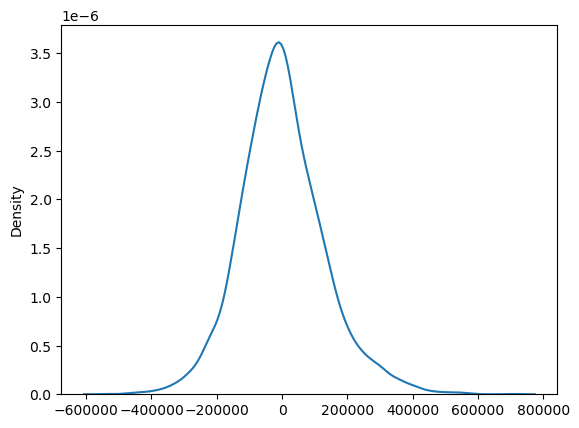

In [314]:
residuals = lin_reg_ols.resid  # ya-yp (error or residuals)
sns.kdeplot(residuals)
residuals.skew()

In [316]:
residuals.skew() # Skew - -0.5 to 0.5 are considered as very low skewness

0.40072578550016474

### Homoscedasity

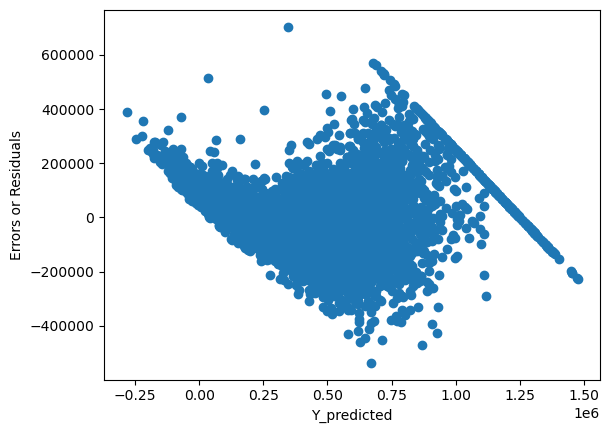

In [317]:
plt.xlabel("Y_predicted")
plt.ylabel("Errors or Residuals")
plt.scatter(y_train_pred,residuals)
plt.show()

In [318]:
from statsmodels.stats.api import het_goldfeldquandt

In [319]:
het_goldfeldquandt(residuals,x_train_imp)

(0.900731935571595, 0.9964901948990375, 'increasing')

#### pval = 0.91
#### pval > sig lvl(0.05)
#### Ho is accepted
#### Data has homoscedacity (Equal Variance)

### Autocorrelation

In [321]:
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     948.7
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:45:54   Log-Likelihood:                -70898.
No. Observations:                5373   AIC:                         1.418e+05
Df Residuals:                    5348   BIC:                         1.420e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.861e+05   1.16e+04     50.394      0.000    5.63e+05    6.09e+05
km_driven              -3.026e+04   2374.323    -12.746      0.000   -3.49e+04   -2.56e+04
mileage                -1.869e+04   2953.181     -6.330      0.000   -2.45e+04   -1.29e+04
max_power               1.218e+05   2570.398     47.391      0.000    1.17e+05    1.27e+05
Vahicle_age            -1.408e+05   2668.233    -52.767      0.000   -1.46e+05   -1.36e+05
fuel_Diesel             1.295e+05   5111.020     25.332      0.000    1.19e+05    1.39e+05
fuel_LPG                5.556e+04   2.45e+04      2.271      0.023    7601.902    1.04e+05
seller_type_Individual -2.447e+04   6154.987     -3.975      0.000   -3.65e+04   -1.24e+04
transmission_Manual    -8.048e+04   7708.811    -10.440      0.000   -9.56e+04   -6.54e+04
owner_2                -3.412e+04   4360.360     -7.825      0.000   -4.27e+04   -2.56e+04
owner_3                -3.113e+04   7397.205     -4.208      0.000   -4.56e+04   -1.66e+04
seats_4.0               1.032e+05   1.62e+04      6.389      0.000    7.15e+04    1.35e+05
seats_5.0              -6.581e+04   6563.920    -10.026      0.000   -7.87e+04   -5.29e+04
seats_6.0              -1.518e+05   1.98e+04     -7.668      0.000   -1.91e+05   -1.13e+05
brand_Audi              2.395e+05   2.78e+04      8.622      0.000    1.85e+05    2.94e+05
brand_BMW                1.67e+05   2.32e+04      7.201      0.000    1.22e+05    2.12e+05
brand_Chevrolet        -1.349e+05   1.03e+04    -13.159      0.000   -1.55e+05   -1.15e+05
brand_Daewoo            2.534e+05   9.26e+04      2.738      0.006    7.19e+04    4.35e+05
brand_Datsun           -1.561e+05    2.1e+04     -7.451      0.000   -1.97e+05   -1.15e+05
brand_Fiat             -1.306e+05    2.4e+04     -5.435      0.000   -1.78e+05   -8.35e+04
brand_Jaguar            2.203e+05   5.01e+04      4.399      0.000    1.22e+05    3.18e+05
brand_Jeep              2.382e+05   3.33e+04      7.154      0.000    1.73e+05    3.03e+05
brand_Mercedes-Benz     2.526e+05   2.19e+04     11.519      0.000     2.1e+05    2.96e+05
brand_Tata              -1.59e+05   6376.241    -24.941      0.000   -1.72e+05   -1.47e+05
brand_Volkswagen        -8.91e+04   1.15e+04     -7.769      0.000   -1.12e+05   -6.66e+04
==============================================================================
Omnibus:                      264.832   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.667
Skew:                           0.401   Prob(JB):                     8.35e-99
Kurtosis:                       4.173   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix

#### Durbin Watson values : 0-4
#### IF the values closer to 2, then there is no autocorrelation

#### DW - 1.944 which is closer to 2. There is no autocorrelation in our model

# Final Model

In [322]:
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     948.7
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:51:38   Log-Likelihood:                -70898.
No. Observations:                5373   AIC:                         1.418e+05
Df Residuals:                    5348   BIC:                         1.420e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.861e+05   1.16e+04     50.394      0.000    5.63e+05    6.09e+05
km_driven              -3.026e+04   2374.323    -12.746      0.000   -3.49e+04   -2.56e+04
mileage                -1.869e+04   2953.181     -6.330      0.000   -2.45e+04   -1.29e+04
max_power               1.218e+05   2570.398     47.391      0.000    1.17e+05    1.27e+05
Vahicle_age            -1.408e+05   2668.233    -52.767      0.000   -1.46e+05   -1.36e+05
fuel_Diesel             1.295e+05   5111.020     25.332      0.000    1.19e+05    1.39e+05
fuel_LPG                5.556e+04   2.45e+04      2.271      0.023    7601.902    1.04e+05
seller_type_Individual -2.447e+04   6154.987     -3.975      0.000   -3.65e+04   -1.24e+04
transmission_Manual    -8.048e+04   7708.811    -10.440      0.000   -9.56e+04   -6.54e+04
owner_2                -3.412e+04   4360.360     -7.825      0.000   -4.27e+04   -2.56e+04
owner_3                -3.113e+04   7397.205     -4.208      0.000   -4.56e+04   -1.66e+04
seats_4.0               1.032e+05   1.62e+04      6.389      0.000    7.15e+04    1.35e+05
seats_5.0              -6.581e+04   6563.920    -10.026      0.000   -7.87e+04   -5.29e+04
seats_6.0              -1.518e+05   1.98e+04     -7.668      0.000   -1.91e+05   -1.13e+05
brand_Audi              2.395e+05   2.78e+04      8.622      0.000    1.85e+05    2.94e+05
brand_BMW                1.67e+05   2.32e+04      7.201      0.000    1.22e+05    2.12e+05
brand_Chevrolet        -1.349e+05   1.03e+04    -13.159      0.000   -1.55e+05   -1.15e+05
brand_Daewoo            2.534e+05   9.26e+04      2.738      0.006    7.19e+04    4.35e+05
brand_Datsun           -1.561e+05    2.1e+04     -7.451      0.000   -1.97e+05   -1.15e+05
brand_Fiat             -1.306e+05    2.4e+04     -5.435      0.000   -1.78e+05   -8.35e+04
brand_Jaguar            2.203e+05   5.01e+04      4.399      0.000    1.22e+05    3.18e+05
brand_Jeep              2.382e+05   3.33e+04      7.154      0.000    1.73e+05    3.03e+05
brand_Mercedes-Benz     2.526e+05   2.19e+04     11.519      0.000     2.1e+05    2.96e+05
brand_Tata              -1.59e+05   6376.241    -24.941      0.000   -1.72e+05   -1.47e+05
brand_Volkswagen        -8.91e+04   1.15e+04     -7.769      0.000   -1.12e+05   -6.66e+04
==============================================================================
Omnibus:                      264.832   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.667
Skew:                           0.401   Prob(JB):                     8.35e-99
Kurtosis:                       4.173   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix